# FI curves

Show explicit changes in excitbility with H

In [48]:
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 50})

%matplotlib inline

import seaborn as sns
sns.set(font_scale=3)
sns.set_style('ticks', {'axes.edgecolor': '0'})

import numpy as np

from resistingrhythm.util import poisson_impulse
from resistingrhythm.util import poisson_oscillation
from resistingrhythm.util import current_pulse
from resistingrhythm.util import load_spikes
from resistingrhythm.util import create_times

from resistingrhythm.neurons import HHH

from fakespikes.rates import square_pulse

# Simulation

Run twice. Once with osc_rate = 0. Once with osc_rate = 1.5

## Tune

In [115]:
# Shared parameters
time = 4
N = 100
tau_h = 1

V_e = 0
tau_e = 5e-3
w = (5e-6, 50e-6)

dt = 1e-5

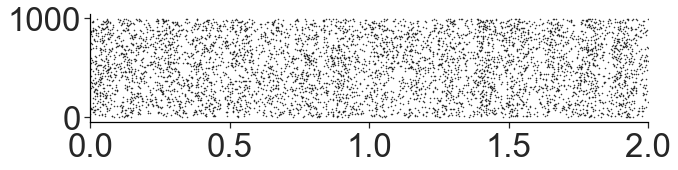

In [116]:
# Load some input
osc_name = "/Users/qualia/Code/resistingrhythm/data/osc115.csv"
stim_name = "/Users/qualia/Code/resistingrhythm/data/stim3.csv"

# ns_osc, ts_osc = np.asarray([]), np.asarray([])
ns_osc, ts_osc = load_spikes(osc_name)

# -
# plt.figure()
fig, ax = plt.subplots(1, sharex=True, figsize=(10, 2))

_ = ax.plot(ts_osc, ns_osc, 
               markersize=.5, marker='o', linestyle='', color='k')
# _ = ax.set_yticklabels([])
_ = ax.set_xlim(0, 2)
sns.despine()

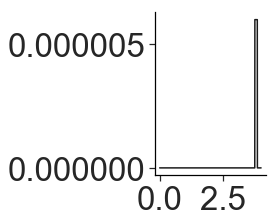

In [129]:
# Create square wave
a = 0.6e-5
t_pulse = 3.75
w_pulse = .1
# t_pulse = 19.5
# w_pulse = .1

times = create_times((0, time), dt=dt)
Is = square_pulse(times, a, t_pulse, w_pulse, dt=dt, min_a=0)

# -
fig, ax = plt.subplots(1, sharex=True, figsize=(2, 3))
_ = ax.plot(times, Is, color='k')
# _ = ax.set_xlim(19, 20.0)
sns.despine()

In [130]:
# Run 1
results_1 = HHH(
    time,
    np.asarray([]), # No spike input
    np.asarray([]),
    ns_osc,
    ts_osc,
    external_current=Is,
    N=N,
    Ca_target=0.003,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_e,
    V_osc=V_e,
    sigma=0,
    homeostasis=False,
    time_step=dt,
    seed_value=42
)

In [131]:
# Run 2
results_2 = HHH(
    time,
    np.asarray([]), # No spike input
    np.asarray([]),
    ns_osc,
    ts_osc,
    external_current=Is,
    N=N,
    Ca_target=0.003,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_e,
    V_osc=V_e,
    sigma=0,
    homeostasis=True,
    time_step=dt,
    seed_value=42
)

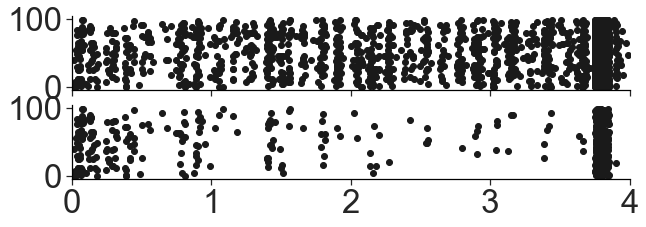

In [132]:
# -
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 3))
_ = ax[0].plot(results_1['ts'], results_1['ns'], marker='o', linestyle='', color='k')
_ = ax[1].plot(results_2['ts'], results_2['ns'], marker='o', linestyle='', color='k')
_ = ax[0].set_xlim(0, 4)
sns.despine()

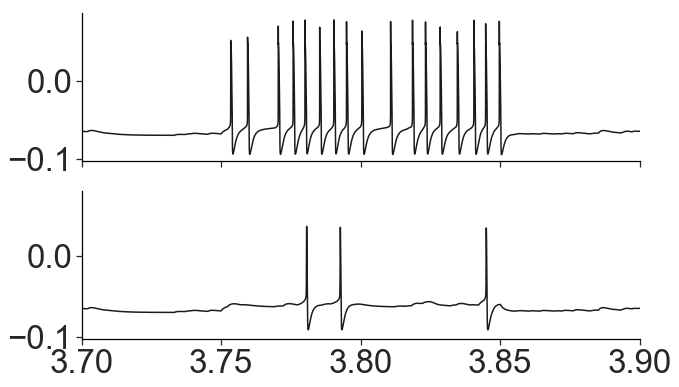

In [133]:
# -
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 6))
_ = ax[0].plot(results_1['times'], results_1['v_m'][0,:], linestyle='-', color='k')
_ = ax[1].plot(results_2['times'], results_2['v_m'][0,:], linestyle='-', color='k')
_ = ax[0].set_xlim(3.7, 3.9)
sns.despine()

In [134]:
# Est rate
rate_1 = (results_1['ts'] > 3.5).sum()
rate_2 = (results_2['ts'] > 3.5).sum()
print(f"Rate 1: {rate_1}, Rate 2: {rate_2}")

Rate 1: 1687, Rate 2: 340


# Generate curves

In [ ]:
# Shared parameters
time = 4
N = 100
tau_h = 1

V_e = 0
tau_e = 5e-3
w = (5e-6, 50e-6)

dt = 1e-5

# Impulse desgin
a_start = 0.5e-5
a_stop = 0.7e-5
n_steps = 20
a_range = np.arange(a_start, a_stop, n_steps)

# -
rates_1, rates_2 = [], []
for i, a in enumerate(a_range):
    # Run 1
    results_1 = HHH(
        time,
        np.asarray([]), # No spike input
        np.asarray([]),
        ns_osc,
        ts_osc,
        external_current=Is,
        N=N,
        Ca_target=0.003,
        tau_h=tau_h,
        w_in=w,
        tau_in=tau_e,
        V_in=V_e,
        bias_in=0.0e-9,
        w_osc=w,
        tau_osc=tau_e,
        V_osc=V_e,
        sigma=0,
        homeostasis=False,
        time_step=dt,
        seed_value=42
    )
    
    # Run 2
    results_2 = HHH(
        time,
        np.asarray([]), # No spike input
        np.asarray([]),
        ns_osc,
        ts_osc,
        external_current=Is,
        N=N,
        Ca_target=0.003,
        tau_h=tau_h,
        w_in=w,
        tau_in=tau_e,
        V_in=V_e,
        bias_in=0.0e-9,
        w_osc=w,
        tau_osc=tau_e,
        V_osc=V_e,
        sigma=0,
        homeostasis=True,
        time_step=dt,
        seed_value=42
    )
    
    # Extract rates, and save
    r_1 = (results_1['ts'] > 3.5).sum()
    r_2 = (results_2['ts'] > 3.5).sum()
    rates_1.append(r_1)
    rates_2.append(r_2)